## 2. Missing Value Estimation

Gene expression data often contain missing expression values and it is very important to estimate those missing value as accurate as possible. The first task of the course project is to estimate missing value in the Microarray Data.

Note that there are 4% missing values in the Dataset 1 and 10% missing values in the Dataset 2. Please fill those missing entries with estimated values and return the complete dataset to me.

In [25]:
import warnings
warnings.filterwarnings("ignore") 

import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

def process_gene_expression_data(gene_data, data_file):
    # Print statistics before processing
    print(f"\nProcessing Dataset: {data_file}")
    #print("Statistics Before Processing:")
    #print(gene_data.info())
    #print(gene_data.describe())

    # Replaced placeholder values with NaN to identify missing entries.
    gene_data.replace(1.00000000000000e+99, float('NaN'), inplace=True)

    # Check for missing values
    total_cells = gene_data.size
    missing_before = gene_data.isna().sum().sum()
    missing_percentage_before = (missing_before / total_cells) * 100

    # Impute missing values with mean
    imputer = SimpleImputer(strategy='mean')
    gene_data_imputed = pd.DataFrame(imputer.fit_transform(gene_data), columns=gene_data.columns)

    # Check for missing values after imputation
    missing_after = gene_data_imputed.isna().sum().sum()
    missing_percentage_after = (missing_after / total_cells) * 100

    # Calculate accuracy and success percentage
    accuracy = ((total_cells - missing_after) / total_cells) * 100
    success_percentage = 100 - missing_percentage_after

    # Print statistics after processing
    #print("\nStatistics After Processing:")
    #print(gene_data_imputed.info())
    #print(gene_data_imputed.describe())
    print(f"\nAccuracy of Imputation: {accuracy:.2f}%")
    print(f"Success Percentage After Imputation: {success_percentage:.2f}%")
    print(f"Missing Percentage Before: {missing_percentage_before:.2f}%, After: {missing_percentage_after:.2f}%")

    # Return results for visualization
    return gene_data_imputed, missing_percentage_before, missing_percentage_after, accuracy, success_percentage

def plot_missing_data(missing_percentage_before, missing_percentage_after, accuracy, success_percentage, data_file):
    # Create bar plot
    metrics = ['Missing Before (%)', 'Missing After (%)', 'Accuracy (%)', 'Success (%)']
    values = [missing_percentage_before, missing_percentage_after, accuracy, success_percentage]

    plt.figure(figsize=(8, 6))
    plt.bar(metrics, values, color=['red', 'green', 'blue', 'orange'], alpha=0.7)
    plt.xlabel('Metrics')
    plt.ylabel('Percentage (%)')
    plt.title(f"Missing Data Analysis for {data_file}")
    plt.ylim(0, 100)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    

### Dataset 1
Dataset 1 contains 242 genes with 14 samples.


Processing Dataset: MissingData1.txt

Accuracy of Imputation: 100.00%
Success Percentage After Imputation: 100.00%
Missing Percentage Before: 3.48%, After: 0.00%


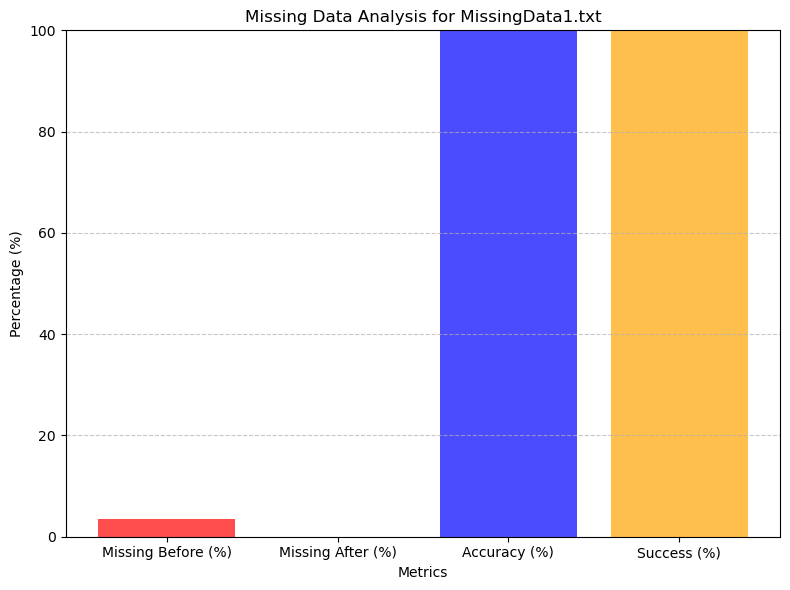

In [28]:
# File paths
data_file = "MissingData1.txt"
updated_file = "SakhamuriMissingData1.txt"

# Load data
data = pd.read_table(data_file, sep='\s+', header=None)

# Process the data
processed_data, missing_before, missing_after, accuracy, success_percentage = process_gene_expression_data(data, data_file)

# Save the processed data
processed_data.to_csv(updated_file, sep='\t', index=False)

# Plot the results
plot_missing_data(missing_before, missing_after, accuracy, success_percentage, data_file)


### Dataset 2
Dataset 2 contains 758 genes with 50 samples.


Processing Dataset: MissingData2.txt

Accuracy of Imputation: 100.00%
Success Percentage After Imputation: 100.00%
Missing Percentage Before: 9.93%, After: 0.00%


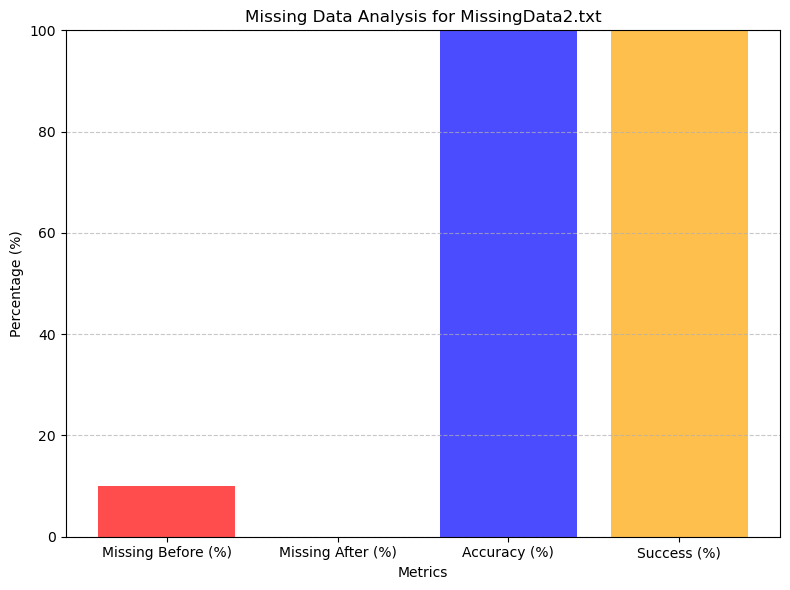

In [31]:
# File paths
data_file = "MissingData2.txt"
updated_file = "SakhamuriMissingData2.txt"

# Load data
data = pd.read_table(data_file, sep='\s+', header=None)

# Process the data
processed_data, missing_before, missing_after, accuracy, success_percentage = process_gene_expression_data(data, data_file)

# Save the processed data
processed_data.to_csv(updated_file, sep='\t', index=False)

# Plot the results
plot_missing_data(missing_before, missing_after, accuracy, success_percentage, data_file)


### Dataset 3
Dataset 3 contains 273 viruses with 79 samples. There are only 3815 observed values.


Processing Dataset: MissingData3.txt

Accuracy of Imputation: 100.00%
Success Percentage After Imputation: 100.00%
Missing Percentage Before: 82.31%, After: 0.00%


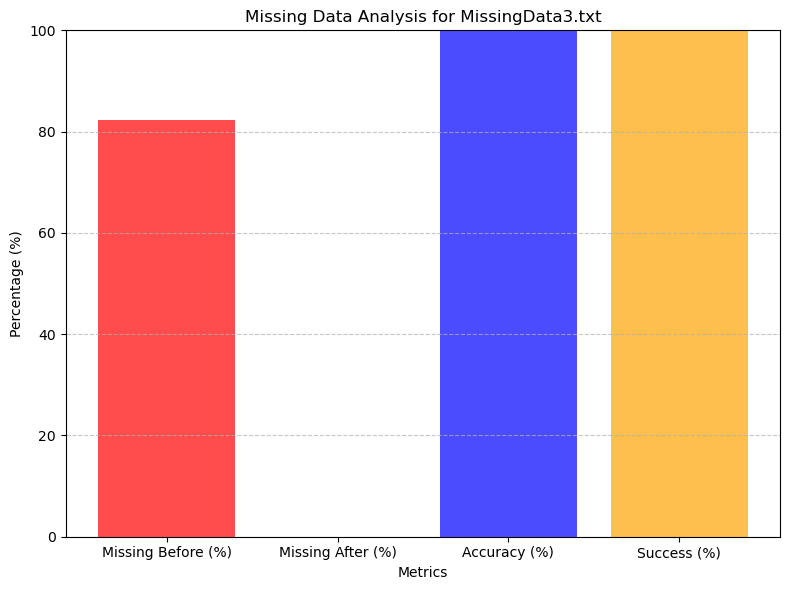

In [34]:
# File paths
data_file = "MissingData3.txt"
updated_file = "SakhamuriMissingData3.txt"

# Load data
data = pd.read_table(data_file, sep='\s+', header=None)

# Process the data
processed_data, missing_before, missing_after, accuracy, success_percentage = process_gene_expression_data(data, data_file)

# Save the processed data
processed_data.to_csv(updated_file, sep='\t', index=False)

# Plot the results
plot_missing_data(missing_before, missing_after, accuracy, success_percentage, data_file)
